# K Nearest Neighbors on Anonymized Employee Datasets with k={3,5,10,20,50}

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

/var/folders/dw/pfbgqvcn34zbfx6rtv1j5n680000gn/T/ipykernel_91063/3413586779.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def encode(dataframes):
    for df in dataframes:
        education = preprocessing.LabelEncoder().fit(df['Education'])
        df['Education'] = education.transform(df['Education'])

        city = preprocessing.LabelEncoder().fit(df['City'])
        df['City'] = city.transform(df['City'])

        gender = preprocessing.LabelEncoder().fit(df['Gender'])
        df['Gender'] = gender.transform(df['Gender'])

        ever_benched = preprocessing.LabelEncoder().fit(df['EverBenched'])
        df['EverBenched'] = ever_benched.transform(df['EverBenched'])

        experience = preprocessing.LabelEncoder().fit(df['ExperienceInCurrentDomain'])
        df['ExperienceInCurrentDomain'] = experience.transform(df['ExperienceInCurrentDomain'])

        joining_year = preprocessing.LabelEncoder().fit(df['JoiningYear'])
        df['JoiningYear'] = joining_year.transform(df['JoiningYear'])

        payment_tier = preprocessing.LabelEncoder().fit(df['PaymentTier'])
        df['PaymentTier'] = payment_tier.transform(df['PaymentTier'])

        age = preprocessing.LabelEncoder().fit(df['Age'])
        df['Age'] = age.transform(df['Age'])

        leave = preprocessing.LabelEncoder().fit(df['LeaveOrNot'])
        df['LeaveOrNot'] = leave.transform(df['LeaveOrNot'])



In [3]:
def read_csvs(anonymizer):
    dataframes = []
    for i in [3,5,10,20,50]:
        dataframes.append(pd.read_csv("Employee/EmployeeDatasets/" + anonymizer + "_" + str(i) + ".csv"))
    return dataframes

In [4]:
# Define variables to store results
all_acc = {}
avg_acc_for_anonymizer = {}
avg_acc_for_k = {}

## Read datasets randomized with random anonymizer

In [5]:
# Read randomized datasets for random anonymization
dataframes = read_csvs("random")

In [6]:
encode(dataframes)

In [7]:
k = [3,5,10,20,50]
i = 0
accuracy = {}
print("KNN Classifier on Employee Dataset")
for df in dataframes:
    print("KNN on Random Anonymized Employee Dataset with k = " + str(k[i]))
    X = df[['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age' ,'Gender', 'EverBenched', 'ExperienceInCurrentDomain']]
    y = df['LeaveOrNot'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

    # K Nearest Neighbors Classifier on Employee Dataset
    knn = KNeighborsClassifier(metric='minkowski')
    param_grid = {'n_neighbors': list(range(3,51))}
    grid_knn = GridSearchCV(knn, param_grid, cv=5, refit=True)
    grid_knn.fit(X_train, y_train)

    
    knn = grid_knn.best_estimator_
    acc = knn.score(X_test, y_test)

    print("Accuracy on test set: " + str(acc))
    accuracy[k[i]] = acc
    i += 1

all_acc["Random"] = accuracy
avg_acc_for_anonymizer["Random"] = np.mean(list(accuracy.values()))


KNN Classifier on Employee Dataset
KNN on Random Anonymized Employee Dataset with k = 3
Accuracy on test set: 0.6
KNN on Random Anonymized Employee Dataset with k = 5
Accuracy on test set: 0.65
KNN on Random Anonymized Employee Dataset with k = 10
Accuracy on test set: 0.64
KNN on Random Anonymized Employee Dataset with k = 20
Accuracy on test set: 0.64
KNN on Random Anonymized Employee Dataset with k = 50
Accuracy on test set: 0.64


## Read datasets randomized with clustering randomizer

In [8]:
dataframes = read_csvs("clustering")

In [9]:
encode(dataframes)

In [10]:
k = [3,5,10,20,50]
i = 0
accuracy = {}
print("KNN Classifier on Employee Dataset")
for df in dataframes:
    print("KNN on Clustering Anonymized Employee Dataset with k = " + str(k[i]))
    X = df[['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age' ,'Gender', 'EverBenched', 'ExperienceInCurrentDomain']]
    y = df['LeaveOrNot'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

    # K Nearest Neighbors Classifier on Employee Dataset
    knn = KNeighborsClassifier(metric='minkowski')
    param_grid = {'n_neighbors': list(range(3,51))}
    grid_knn = GridSearchCV(knn, param_grid, cv=5, refit=True)
    grid_knn.fit(X_train, y_train)

    
    knn = grid_knn.best_estimator_
    acc = knn.score(X_test, y_test)

    print("Accuracy on test set: " + str(acc))
    accuracy[k[i]] = acc
    i += 1

all_acc["Clustering"] = accuracy
avg_acc_for_anonymizer["Clustering"] = np.mean(list(accuracy.values()))


KNN Classifier on Employee Dataset
KNN on Clustering Anonymized Employee Dataset with k = 3
Accuracy on test set: 0.67
KNN on Clustering Anonymized Employee Dataset with k = 5
Accuracy on test set: 0.66
KNN on Clustering Anonymized Employee Dataset with k = 10
Accuracy on test set: 0.75
KNN on Clustering Anonymized Employee Dataset with k = 20
Accuracy on test set: 0.79
KNN on Clustering Anonymized Employee Dataset with k = 50
Accuracy on test set: 0.56


## Read datasets randomized with topdown anonymizer

In [11]:
dataframes = read_csvs("topdown")

In [12]:
encode(dataframes)

In [13]:
k = [3,5,10,20,50]
i = 0
accuracy = {}
print("KNN Classifier on Employee Dataset")
for df in dataframes:
    print("KNN on Topdown Anonymized Employee Dataset with k = " + str(k[i]))
    X = df[['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age' ,'Gender', 'EverBenched', 'ExperienceInCurrentDomain']]
    y = df['LeaveOrNot'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

    # K Nearest Neighbors Classifier on Employee Dataset
    knn = KNeighborsClassifier(metric='minkowski')
    param_grid = {'n_neighbors': list(range(3,51))}
    grid_knn = GridSearchCV(knn, param_grid, cv=5, refit=True)
    grid_knn.fit(X_train, y_train)

    
    knn = grid_knn.best_estimator_
    acc = knn.score(X_test, y_test)

    print("Accuracy on test set: " + str(acc))
    accuracy[k[i]] = acc
    i += 1

all_acc["Top-down"] = accuracy
avg_acc_for_anonymizer["Top-down"] = np.mean(list(accuracy.values()))


KNN Classifier on Employee Dataset
KNN on Topdown Anonymized Employee Dataset with k = 3
Accuracy on test set: 1.0
KNN on Topdown Anonymized Employee Dataset with k = 5
Accuracy on test set: 1.0
KNN on Topdown Anonymized Employee Dataset with k = 10
Accuracy on test set: 1.0
KNN on Topdown Anonymized Employee Dataset with k = 20
Accuracy on test set: 1.0
KNN on Topdown Anonymized Employee Dataset with k = 50
Accuracy on test set: 1.0


## Plotting

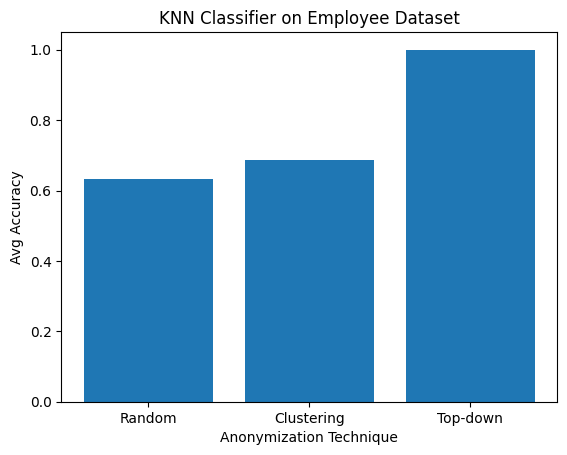

In [14]:
# Plot Knn avg accuracy for different anonymization techniques
plt.bar(range(len(avg_acc_for_anonymizer)), list(avg_acc_for_anonymizer.values()), align='center')
plt.xticks(range(len(avg_acc_for_anonymizer)), list(avg_acc_for_anonymizer.keys()))
plt.title("KNN Classifier on Employee Dataset")
plt.xlabel("Anonymization Technique")
plt.ylabel("Avg Accuracy")
plt.savefig("Figures/knn_avg_acc_3_anonymization_technique_employee.png")
plt.show()

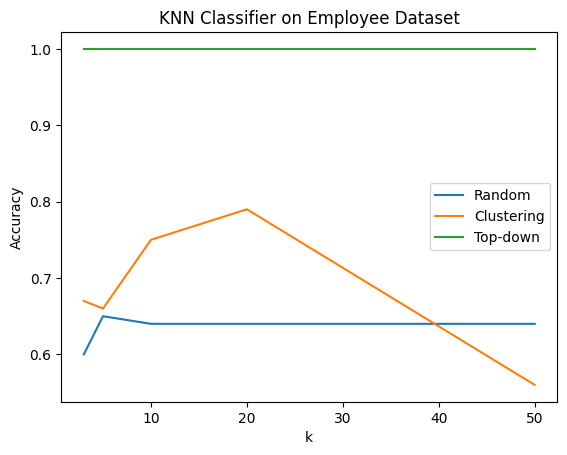

In [15]:
# Plot knn accuracy for different k values for each anonymization technique
plt.plot(k, list(all_acc["Random"].values()), label="Random")
plt.plot(k, list(all_acc["Clustering"].values()), label="Clustering")
plt.plot(k, list(all_acc["Top-down"].values()), label="Top-down")
plt.title("KNN Classifier on Employee Dataset")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("Figures/knn_acc_for_different_k_employee.png")
plt.show()

## Save Results

In [16]:
# save results to csv
results = pd.DataFrame(all_acc)
results.to_csv("Employee/knn_results.csv", index=False)

In [17]:
results

,Random,Clustering,Top-down
3,0.60,0.67,1.0
5,0.65,0.66,1.0
10,0.64,0.75,1.0
20,0.64,0.79,1.0
50,0.64,0.56,1.0
